## Cross-validaton examples and test

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

In [32]:
import random
import os

SEED = 17

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(SEED)

In [12]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])

In [30]:
cmap_data = plt.get_cmap('Paired')

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")

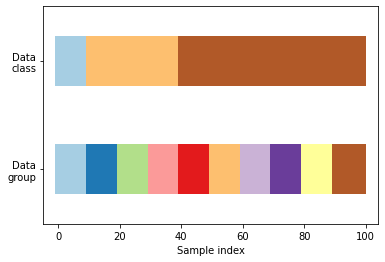

In [31]:
visualize_groups(y, groups, 'no groups')

In [38]:
skf = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
# skf = StratifiedKFold(n_splits=5)
    
for train_index, test_index in skf.split(X, y):

    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]

    print(X_train.shape, X_valid.shape)
    print(train_index[:5], train_index[-5:], test_index[:5])
    
    _, counts_train = np.unique(y_train, return_counts=True)
    _, counts_valid = np.unique(y_valid, return_counts=True)
    print(f'y_train: {counts_train}, y_valid :{counts_valid}')

(80, 10) (20, 10)
[0 1 2 3 4] [94 95 97 98 99] [ 5  9 17 22 24]
y_train: [ 8 24 48], y_valid :[ 2  6 12]
(80, 10) (20, 10)
[0 2 4 5 6] [95 96 97 98 99] [ 1  3 11 12 30]
y_train: [ 8 24 48], y_valid :[ 2  6 12]
(80, 10) (20, 10)
[0 1 3 5 6] [95 96 97 98 99] [ 2  4 14 15 21]
y_train: [ 8 24 48], y_valid :[ 2  6 12]
(80, 10) (20, 10)
[1 2 3 4 5] [95 96 97 98 99] [ 0  8 13 16 18]
y_train: [ 8 24 48], y_valid :[ 2  6 12]
(80, 10) (20, 10)
[0 1 2 3 4] [90 91 92 94 96] [ 6  7 10 23 26]
y_train: [ 8 24 48], y_valid :[ 2  6 12]
